In [6]:
import os

import numpy as np
import pandas as pd
import xgboost as xgb

from glob import glob

In [2]:
dtypes = {
    'ip': 'uint32',
    'app': 'uint16',
    'device': 'uint16',
    'os': 'uint16',
    'channel': 'uint16',
    'is_attributed': 'uint8'
}
to_parse = ['click_time']

In [24]:
sorted(glob('../data/interim/train_2017-*_features.csv'))

['../data/interim/train_2017-11-06_1400_channel_features.csv',
 '../data/interim/train_2017-11-06_1500_channel_features.csv',
 '../data/interim/train_2017-11-06_1600_channel_features.csv',
 '../data/interim/train_2017-11-06_1700_channel_features.csv',
 '../data/interim/train_2017-11-06_1800_channel_features.csv',
 '../data/interim/train_2017-11-06_1900_channel_features.csv',
 '../data/interim/train_2017-11-06_2000_channel_features.csv',
 '../data/interim/train_2017-11-06_2100_channel_features.csv',
 '../data/interim/train_2017-11-06_2200_channel_features.csv',
 '../data/interim/train_2017-11-06_2300_channel_features.csv',
 '../data/interim/train_2017-11-07_0000_channel_features.csv',
 '../data/interim/train_2017-11-07_0100_channel_features.csv',
 '../data/interim/train_2017-11-07_0200_channel_features.csv',
 '../data/interim/train_2017-11-07_0300_channel_features.csv',
 '../data/interim/train_2017-11-07_0400_channel_features.csv',
 '../data/interim/train_2017-11-07_0500_channel_feature

In [26]:
df_train = pd.read_csv('../data/interim/train_2017-11-08_0300_features.csv', dtype=dtypes)

In [27]:
df_train.columns

Index(['app', 'device', 'os', 'channel', 'is_attributed', 'COUNT(clicks)',
       'PERCENT_TRUE(clicks.is_attributed)', 'NUM_UNIQUE(clicks.app)',
       'NUM_UNIQUE(clicks.device)', 'NUM_UNIQUE(clicks.os)',
       'MODE(clicks.app)', 'MODE(clicks.device)', 'MODE(clicks.os)'],
      dtype='object')

In [28]:
X = df_train.copy()
y = X.pop('is_attributed')

In [29]:
clf_xgBoost = xgb.XGBClassifier(
    scale_pos_weight=10,
    reg_alpha=1,
    n_jobs=20, 
    objective = 'binary:logistic'
)

clf_xgBoost.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=20, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=1, reg_lambda=1, scale_pos_weight=10,
       seed=None, silent=True, subsample=1)

In [30]:
from sklearn import preprocessing

importance_dict = {}
for import_type in ['gain', 'cover']:
    importance_dict['xgBoost-'+import_type] = clf_xgBoost.get_booster().get_score(importance_type=import_type)
    
importance_df = pd.DataFrame(importance_dict).fillna(0)
importance_df = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(importance_df),
    columns=importance_df.columns,
    index=importance_df.index
)

importance_df['mean'] = importance_df.mean(axis=1)

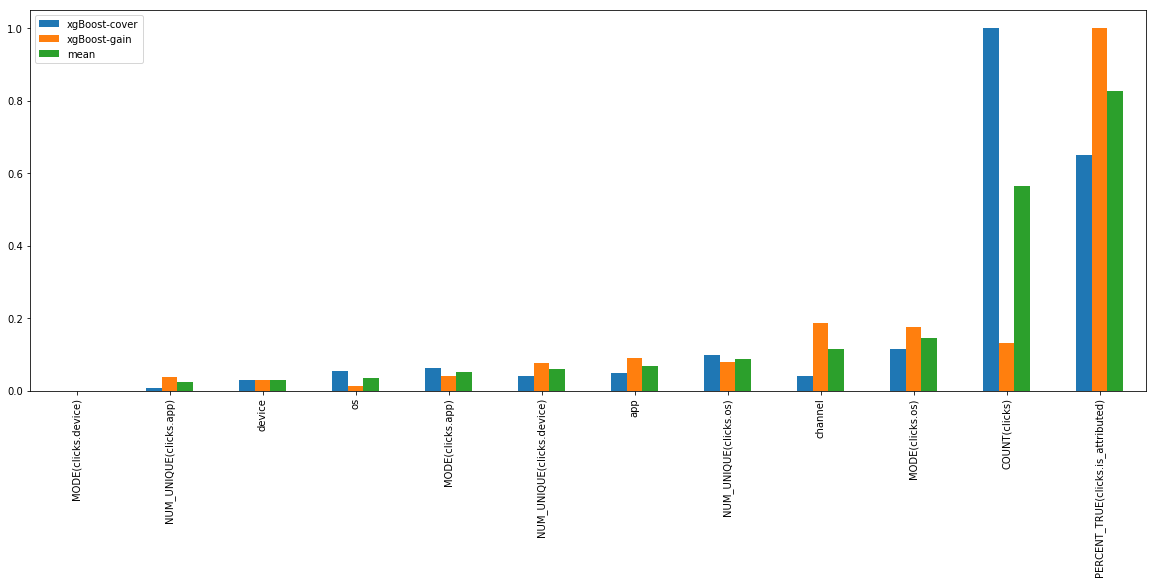

In [31]:
importance_df.sort_values('mean').plot(kind='bar', figsize=(20, 7))